## <font color='darkblue'>What's TSP (Travelling Salesman Problem)</font>
([course link](https://www.udemy.com/course/ai-and-combinatorial-optimization-with-meta-heuristics/learn/lecture/30588868#overview))

## <font color='darkblue'>Simulated Annealing Implementation - TSP</font>
([course link1](https://www.udemy.com/course/ai-and-combinatorial-optimization-with-meta-heuristics/learn/lecture/30602252#overview), [course link2](https://www.udemy.com/course/ai-and-combinatorial-optimization-with-meta-heuristics/learn/lecture/30602254#overview), [course link3](https://www.udemy.com/course/ai-and-combinatorial-optimization-with-meta-heuristics/learn/lecture/30602258#overview) and [course link4](https://www.udemy.com/course/ai-and-combinatorial-optimization-with-meta-heuristics/learn/lecture/30618722#overview))

In [35]:
from random import random, shuffle, sample
import numpy as np
from numpy.random import randint
import  matplotlib.pyplot as plt
from typing import List, Optional

In [9]:
class City:
  def __init__(self):
    self.x = 1000 * random()
    self.y = 1000 * random()
    
  def __str__(self):
    return f'({round(self.x, 1)}, {round(self.y, 1)})'
  
  def __repr__(self):
    return self.__str__()

In [36]:
class SingleTour:
  def __init__(self, tour: Optional[List[City]] = None):
    self.tour = tour or []
      
  def set_tour(self, single_tour:SingleTour):
    self.tour: list[City] = []
    for c in single_tour.tour:
      self.tour.append(c)
    
  def swap(self, index1: int, index2: int):
    self.tour[index1], self.tour[index2] = self.tour[index2], self.tour[index1]
    
  def generate_tour(self, n: int):
    for _ in range(n):
      self.tour.append(City())
      
    shuffle(self.tour)
    
  def get_distance(self):
    total_distance = 0
    city_count = len(self.tour)
    
    for i in range(len(self.tour)):
      total_distance += self.distance(self.tour[i % city_count], self.tour[(i+1) % city_count])
      
    return total_distance
    
  @staticmethod
  def distance(city1, city2):
    return pow(abs(city1.x-city2.x)**2 + abs(city1.y-city2.y)**2, 0.2)
    
  def __str__(self):
    return ''.join([str(c) for c in self.tour])
  
  def __repr__(self):
    return self.__str__()

In [106]:
class SimulatedAnnealingTSP:
  def __init__(self,
               num_cities: int,
               min_temp: float,
               max_temp: float,
               cooling_rate: float = 0.02):
    self.num_cities = num_cities
    self._min_temp = min_temp
    self._max_temp = max_temp
    self._cooling_rate = cooling_rate
    self.actual_state = SingleTour()
    self.next_state = None
    self.best_state = SingleTour()
    self.best_energy = float('inf')
    
  def run(self):
    self.actual_state.generate_tour(self.num_cities)
    actual_energy = self.actual_state.get_distance()
    print(f'Initial tour distance: {actual_energy:.02f}')
    temp = self._max_temp    
    while temp > self._min_temp:
      new_state = self.generate_random_state()
      new_energy = new_state.get_distance()

      if random() < self.accept_bad_move_prob(new_energy, actual_energy, temp):
        self.actual_state.set_tour(new_state)
        actual_energy = self.actual_state.get_distance()
    
      if new_energy < self.best_energy:        
        self.best_state = SingleTour(new_state.tour)
        self.best_energy = new_energy
        
      # Decrease the temperature
      temp = temp * (1 - self._cooling_rate)
    
    print(f'Final best tour distance: {self.best_state.get_distance():.02f}')
    final_tour = self.best_state.tour + [self.best_state.tour[0]]
    x_list = list(map(lambda t: t.x, final_tour))
    y_list = list(map(lambda t: t.y, final_tour))
    plt.scatter(x_list, y_list)
    plt.plot(x_list, y_list)
      
  def accept_bad_move_prob(self, new_energy, actual_energy, temp):
    if new_energy < actual_energy:
      return 1
    
    return np.exp((actual_energy - new_energy) / temp)
    
  def generate_random_state(self):
    new_tour = SingleTour(self.actual_state.tour)
    new_tour.swap(*sample(range(len(new_tour.tour)), 2))
    return new_tour

Initial tour distance: 162.20
Final best tour distance: 108.33
CPU times: user 1.08 s, sys: 6.61 ms, total: 1.09 s
Wall time: 1.08 s


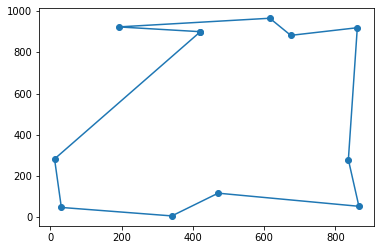

In [120]:
%%time
sa_tsp = SimulatedAnnealingTSP(11, min_temp=1, max_temp=200, cooling_rate=0.0001)
sa_tsp.run()